In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Top200 = pd.read_csv('Top200_Stations.csv',index_col=0)

### Correlation Between Features Selected by XGBoost Model 

In [3]:
columns = ['start_station_checkout_counts','cluster','Commute','tot_docks','TAVG','start_hour','start_station_latitude',
           'TMAX','start_station_longitude','start_dayofweek','holidays','PRCP','start_year','start_month','TMIN',
           'Fog','SNWD','Thunder','start_day','AWND','Haze','Heavy_Fog','Glaze','SNOW']
corr = Top200[columns].corr()

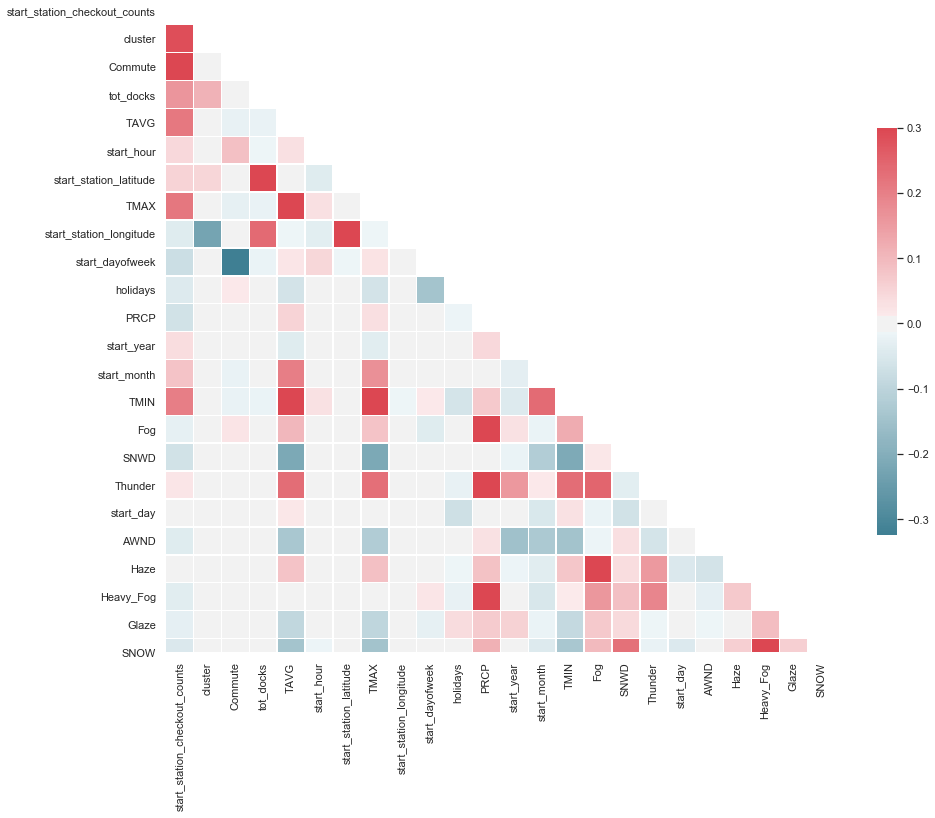

In [4]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## Check Relation Between Target(Hourly Checkout Counts) and Features

### Cluster's Impact on Checkout Counts

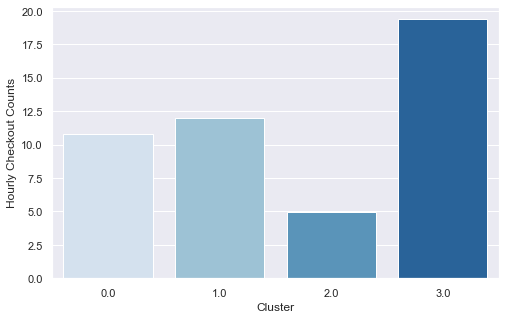

In [5]:
cluster_df = Top200.groupby('cluster').agg({'start_station_checkout_counts':'mean'}).reset_index()
cluster_df.columns = ['Cluster','Hourly Checkout Counts'] 
plt.figure(figsize = (8,5))
sns.set_style('darkgrid')
sns.barplot(x ='Cluster', y ="Hourly Checkout Counts", data =cluster_df,palette='Blues');

- The target variable hourly checkout counts has a strong dependence on which cluster the station belongs to. Cluster 3 on average has a much higher hourly checkout counts than any other clusters.

### Rush Hours' Impact on Checkout Counts

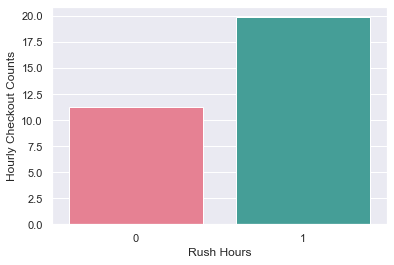

In [6]:
rushhour_df = Top200.groupby('Commute').agg({'start_station_checkout_counts':'mean'}).reset_index()
rushhour_df.columns = ['Rush Hours','Hourly Checkout Counts'] 
plt.figure(figsize = (6,4))
sns.set_style('darkgrid')
sns.barplot(x ='Rush Hours', y ='Hourly Checkout Counts', data = rushhour_df,palette='husl');

 - During rush hours(8-10am, 4-7pm) on weekdays, on average there are a lot more bikes being checked out than when it is non rush hours. 

### Capacity of Dock's Impact on Checkout Counts

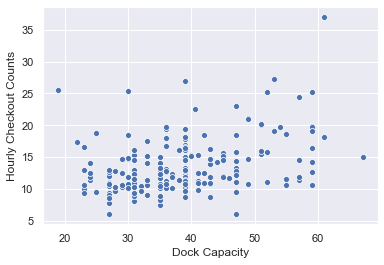

In [7]:
tot_docks_df = Top200.groupby(['start_station_longitude','start_station_latitude']).\
agg({'tot_docks':'median','start_station_checkout_counts':'mean'}).reset_index()
tot_docks_df.columns = ['Longitude','Latitude','Dock Capacity','Hourly Checkout Counts'] 
plt.figure(figsize = (6,4))
sns.set_style('darkgrid')
sns.scatterplot(x ='Dock Capacity', y ='Hourly Checkout Counts', data = tot_docks_df);

- No evidence of a strong relation between hourly checkout counts and dock capacity

### Temperature's impact on Checkout Counts

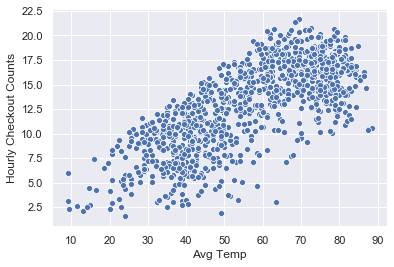

In [8]:
temp_df = Top200.groupby(['start_year','start_month','start_day'])[['start_station_checkout_counts','TAVG']].mean().reset_index()
temp_df.columns=['Year','Month','Day','Hourly Checkout Counts','Avg Temp']
plt.figure(figsize = (6,4))
sns.set_style('darkgrid')
sns.scatterplot(x ='Avg Temp', y ='Hourly Checkout Counts', data = temp_df);

- There is a strong linear realationship between the average temperature and hourly checkout counts. Ther warmer the weather is, the more activity.

### Time(Hour)'s Impact on Checkout Counts

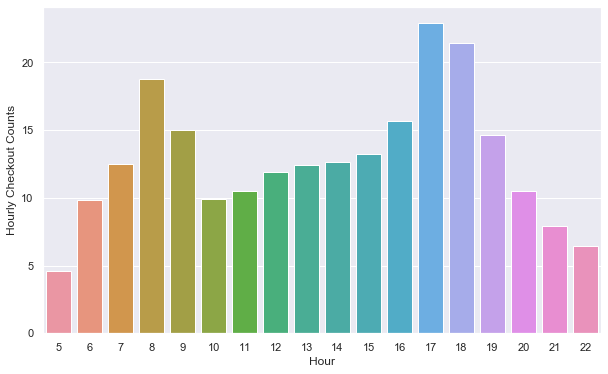

In [9]:
hour_df = Top200.groupby('start_hour').agg({'start_station_checkout_counts':'mean'}).reset_index()
hour_df.columns = ['Hour','Hourly Checkout Counts'] 
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.barplot(x ='Hour', y ='Hourly Checkout Counts', data = hour_df);

- Amount of activity fluctuates during a day. There are two peaks in a day, first during the morning rush hours(8-10am) and the second during afternoon rush hours(4-7pm).

### Station's Location (Longitude and Latitude)'s impact on Checkout Counts

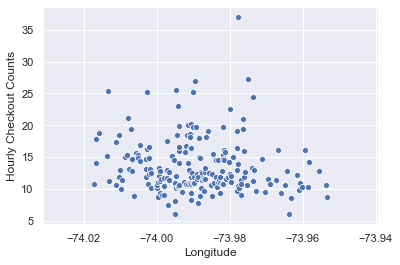

In [10]:
location_df = Top200.groupby(['start_station_longitude','start_station_latitude']).\
agg({'start_station_checkout_counts':'mean'}).reset_index()
location_df.columns=['Longitude','Latitude','Hourly Checkout Counts']
plt.figure(figsize = (6,4))
sns.set_style('darkgrid')
sns.scatterplot(x ='Longitude', y ='Hourly Checkout Counts', data = location_df);

- It appears that there is more activity in stations that are located west of -73.97W than stations that are located east of -73.97W. Areas with smaller longitudes are clsoer to NJ, and most of Manhattan. Areas with larger longitudes are closer to Upper Eastside and Queens.

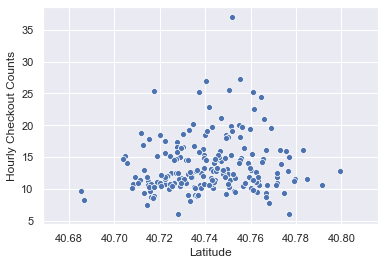

In [11]:
plt.figure(figsize = (6,4))
sns.set_style('darkgrid')
sns.scatterplot(x ='Latitude', y ='Hourly Checkout Counts', data = location_df);

- It appears that stations located at 40.75N have the highest activity. This is the Mid Manhattan area, the further away from Mid Manhattan regardless of North or South, the less activity the stations have. 

### Day of Week's Impact on Checkout Counts

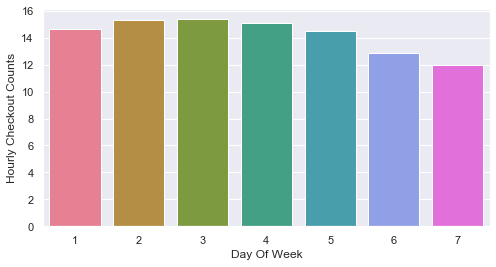

In [12]:
day_df = Top200.groupby('start_dayofweek').agg({'start_station_checkout_counts':'mean'}).reset_index()
day_df.columns = ['Day Of Week','Hourly Checkout Counts'] 
plt.figure(figsize = (8,4))
sns.set_style('darkgrid')
sns.barplot(x ='Day Of Week', y ='Hourly Checkout Counts', data = day_df,palette='husl');

- Weekdays have more activities than weekends.

### Holiday's Impact on Checkout Counts

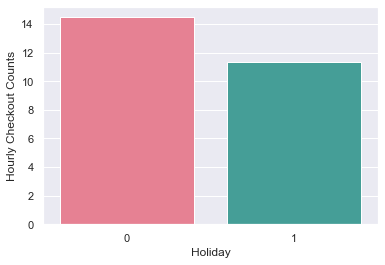

In [13]:
holiday_df = Top200.groupby('holidays').agg({'start_station_checkout_counts':'mean'}).reset_index()
holiday_df.columns = ['Holiday','Hourly Checkout Counts'] 
plt.figure(figsize = (6,4))
sns.set_style('darkgrid')
sns.barplot(x ='Holiday', y ='Hourly Checkout Counts', data = holiday_df,palette='husl');

- There are less activity during holidays. 

### Precipitation's Impact on Checkout Counts

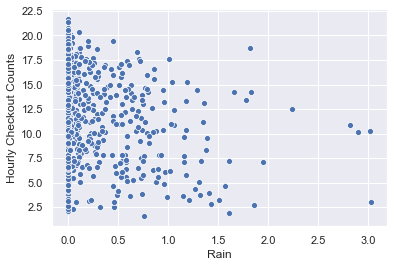

In [14]:
prcp_df = Top200.groupby(['start_year','start_month','start_day'])[['start_station_checkout_counts','PRCP','SNWD']].mean().reset_index()
prcp_df.columns=['Year','Month','Day','Hourly Checkout Counts','Rain','Snow']
plt.figure(figsize = (6,4))
sns.set_style('darkgrid')
sns.scatterplot(x ='Rain', y ='Hourly Checkout Counts', data = prcp_df);

- There is a greater variance in hourly checkout counts when there is no rain versus when there is rain. Light rain does not impact the activity as much as the heavy rain does. 

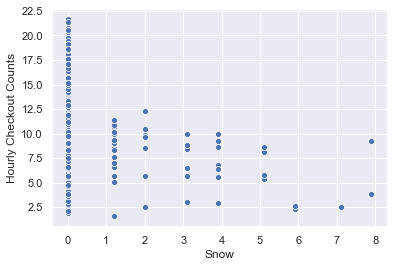

In [15]:
plt.figure(figsize = (6,4))
sns.set_style('darkgrid')
sns.scatterplot(x ='Snow', y ='Hourly Checkout Counts', data = prcp_df);

- There are a lot more activity when there is no snow; however, the snow amount does not appear to have a strong impact on checkout counts 

### Year's Impact on Checkout Counts

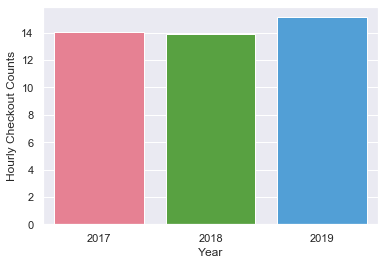

In [16]:
year_df = Top200.groupby('start_year').agg({'start_station_checkout_counts':'mean'}).reset_index()
year_df.columns = ['Year','Hourly Checkout Counts']
plt.figure(figsize = (6,4))
sns.set_style('darkgrid')
sns.barplot(x ='Year', y ='Hourly Checkout Counts', data = year_df, palette='husl');

- There is a jump in activity in 2019 compared to the previous 2 years.This indicates that Citibike gained some popularity in 2019.

### Month's Impact on Checkout Counts

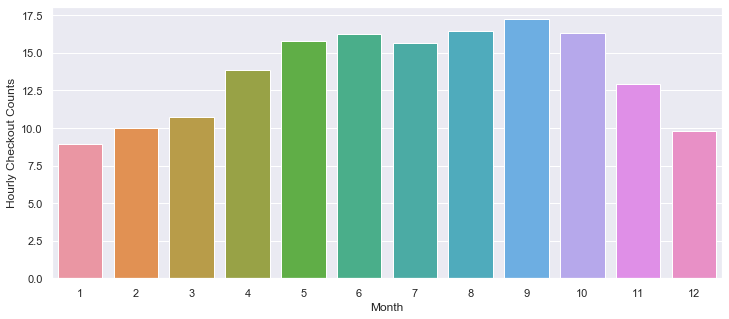

In [17]:
month_df = Top200.groupby('start_month').agg({'start_station_checkout_counts':'mean'}).reset_index()
month_df.columns = ['Month','Hourly Checkout Counts']
plt.figure(figsize = (12,5))
sns.set_style('darkgrid')
sns.barplot(x ='Month', y ='Hourly Checkout Counts', data = month_df);

- Warmer months have a lot more activities than colder months because people spend more time outdoor during warmer months.

### Wind's Impact on Checkout Counts

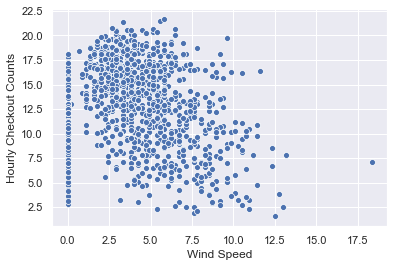

In [18]:
wind_df =Top200.groupby(['start_year','start_month','start_day'])[['start_station_checkout_counts','AWND']].mean().reset_index()
wind_df.columns=['Year','Month','Day','Hourly Checkout Counts','Wind Speed']
plt.figure(figsize = (6,4))
sns.set_style('darkgrid')
sns.scatterplot(x ='Wind Speed', y ='Hourly Checkout Counts', data = wind_df);

- Wind has a strong impact on activity. Generally speaking, a stronger wind will lead to a lower activity. 